# Gated Recurrent Unit

In [9]:
DATASET_FILE = "../output/data/dataset.joblib"
OUTPUT_PATH = "../output/data/gru"

TRAIN_RATIO = 0.70
VAL_RATIO = 0.20
TEST_RATIO = 0.10
RANDOM_STATE = 42

In [10]:
from keras import models, layers, optimizers, callbacks
from matplotlib import font_manager, pyplot as plt
from joblib import load
from pathlib import Path
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from dataset_type import Dataset
import numpy as np

font_prop = font_manager.FontProperties(fname="../submodules/sarabun-font/fonts/Sarabun-Regular.ttf")

In [11]:
DATASET_FILE = Path(DATASET_FILE).resolve()
OUTPUT_PATH = Path(OUTPUT_PATH).resolve()
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

assert DATASET_FILE.is_file()

In [12]:
datasets: dict[str, Dataset] = load(DATASET_FILE)
results: dict[str, float | int] = []

In [13]:
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len])

    return np.array(X_seq), np.array(y_seq)

Sequence Length: 1


I0000 00:00:1742783374.066222 1765021 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1222 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/100


I0000 00:00:1742783376.834219 2213641 service.cc:152] XLA service 0x4766a500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742783376.834235 2213641 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-24 09:29:36.888430: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742783377.240293 2213641 cuda_dnn.cc:529] Loaded cuDNN version 90300


108/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2805 - mae: 1.0779 

I0000 00:00:1742783379.559443 2213641 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 1.6022 - mae: 0.9390 - val_loss: 1.0995 - val_mae: 0.7945
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1744 - mae: 0.8474 - val_loss: 1.0467 - val_mae: 0.7298
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1102 - mae: 0.8346 - val_loss: 0.8073 - val_mae: 0.7253
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9866 - mae: 0.7733 - val_loss: 0.7714 - val_mae: 0.6317
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0004 - mae: 0.7944 - val_loss: 0.6910 - val_mae: 0.6015
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9549 - mae: 0.7527 - val_loss: 0.8171 - val_mae: 0.7362
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0299 - mae: 0.7981 - val_loss: 0.6738 - val_mae: 0.6359
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9488 - mae: 0.7547 - val_loss: 0.6402 - val_mae: 0.5921
Epoch 9/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

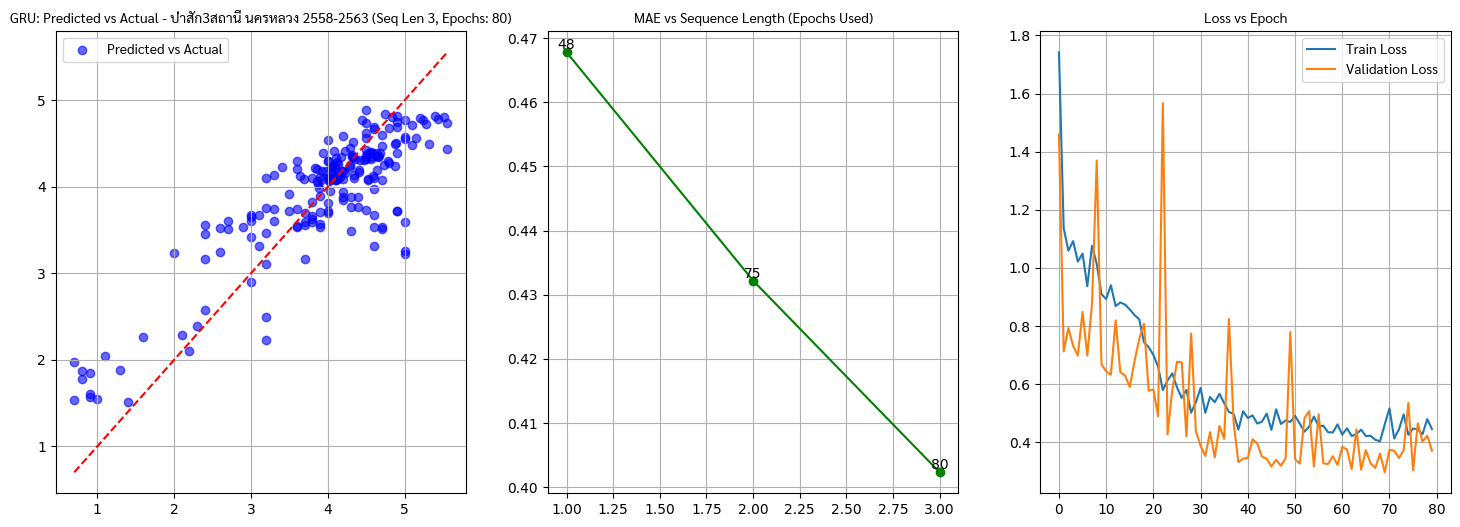

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.6809 - mae: 0.6314 - val_loss: 0.3030 - val_mae: 0.4390
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4975 - mae: 0.5555 - val_loss: 0.2626 - val_mae: 0.3855
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4465 - mae: 0.5318 - val_loss: 0.3175 - val_mae: 0.4632
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5046 - mae: 0.5677 - val_loss: 0.3926 - val_mae: 0.5170
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4380 - mae: 0.5101 - val_loss: 0.2734 - val_mae: 0.4018
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4353 - mae: 0.5272 - val_loss: 0.2566 - val_mae: 0.3776
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4023 - mae: 0.4938 - val_loss: 0.2754 - val_mae: 0.3980
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3821 - mae: 0.4815 - val_loss: 0.4500 - val_mae: 0.5473
Epoch 9/100
350/350 ━━━━━━━━━

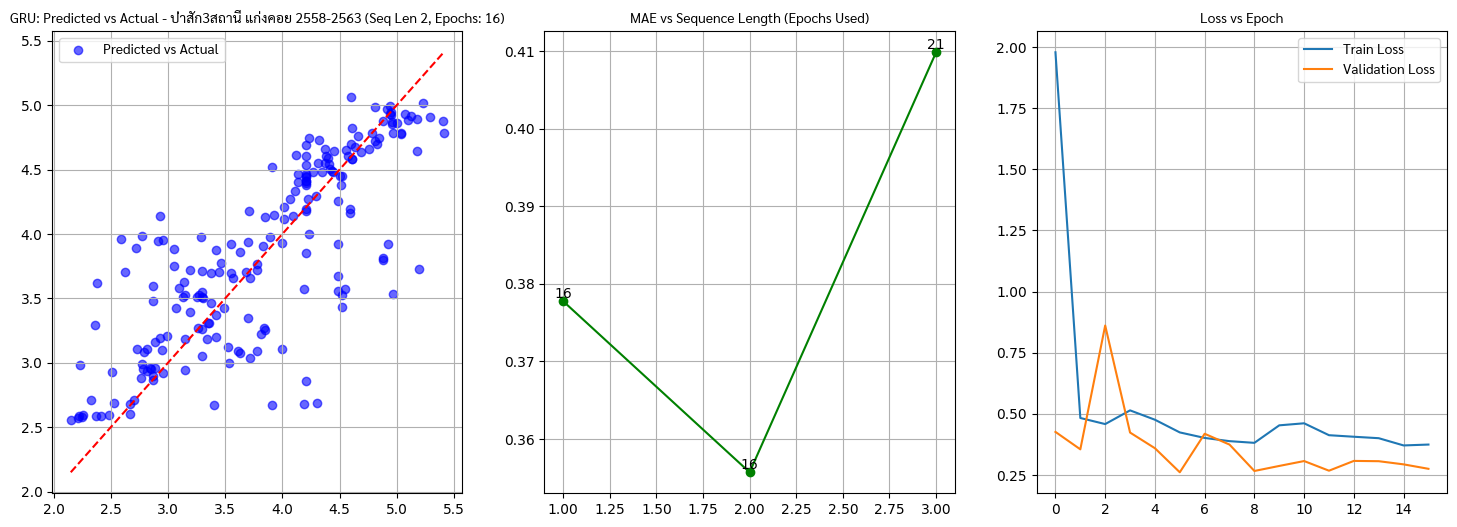

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 3.2329 - mae: 0.9392 - val_loss: 0.4203 - val_mae: 0.4127
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5255 - mae: 0.4377 - val_loss: 0.3956 - val_mae: 0.4153
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5809 - mae: 0.4662 - val_loss: 0.4419 - val_mae: 0.4149
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6309 - mae: 0.5054 - val_loss: 0.3760 - val_mae: 0.3650
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6031 - mae: 0.4643 - val_loss: 0.4036 - val_mae: 0.4030
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5283 - mae: 0.4417 - val_loss: 0.4375 - val_mae: 0.4217
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4825 - mae: 0.4406 - val_loss: 0.3770 - val_mae: 0.3701
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5067 - mae: 0.4303 - val_loss: 0.5369 - val_mae: 0.4421
Epoch 9/100
350/350 ━━━━━━━━━

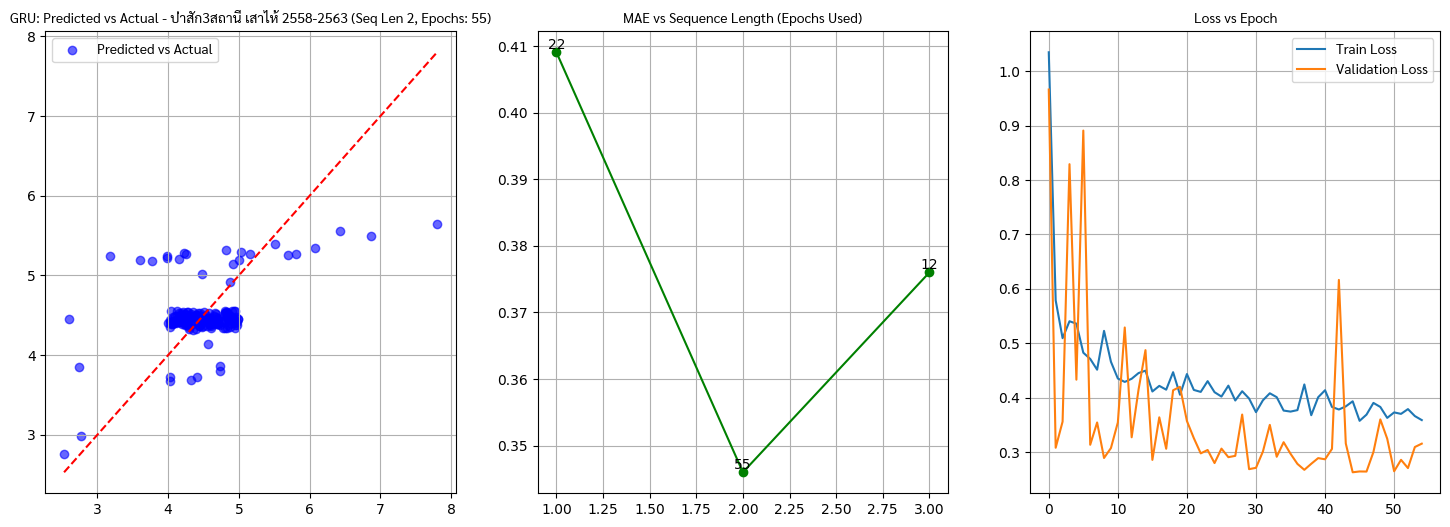

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.1872 - mae: 2.0154 - val_loss: 3.0971 - val_mae: 1.4220
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7077 - mae: 1.4398 - val_loss: 2.5788 - val_mae: 1.0207
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3371 - mae: 1.3349 - val_loss: 2.5173 - val_mae: 1.2433
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5801 - mae: 1.3932 - val_loss: 2.6518 - val_mae: 1.2767
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4284 - mae: 1.3311 - val_loss: 2.6390 - val_mae: 1.2880
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0194 - mae: 1.2485 - val_loss: 2.3256 - val_mae: 1.1718
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6817 - mae: 1.1403 - val_loss: 2.5696 - val_mae: 1.3152
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8702 - mae: 1.2386 - val_loss: 4.0171 - val_mae: 1.7680
Epoch 9/100
350/350 ━━━━━━━━━

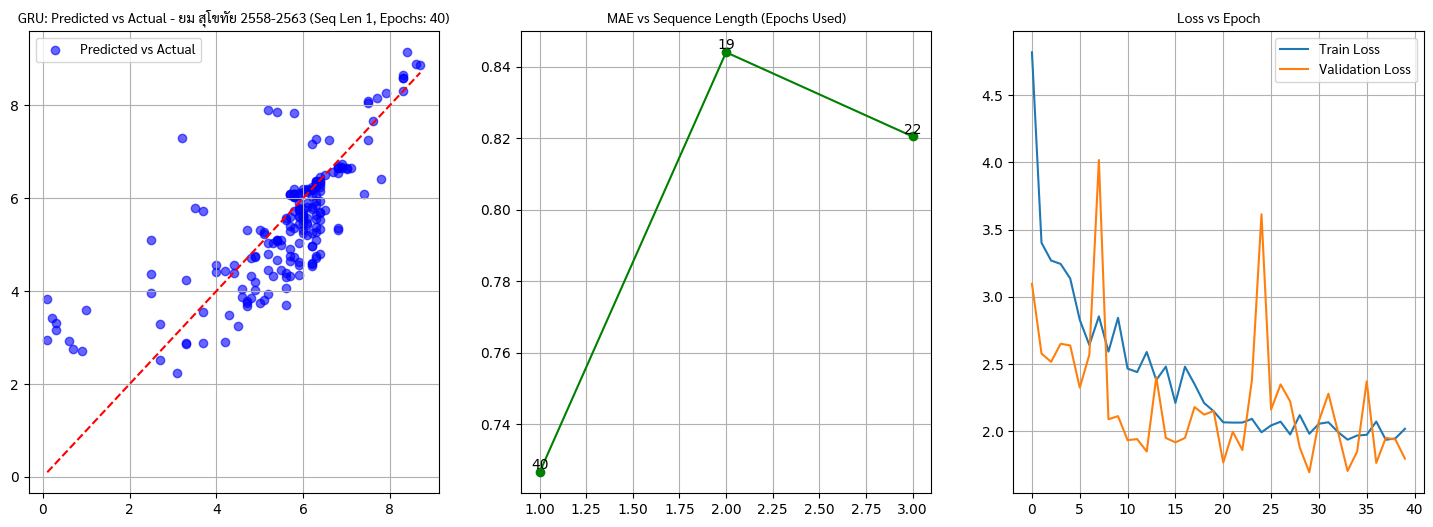

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 4.8259 - mae: 1.8091 - val_loss: 3.0671 - val_mae: 1.3196
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5126 - mae: 1.4605 - val_loss: 2.7341 - val_mae: 1.3973
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0503 - mae: 1.3511 - val_loss: 2.2586 - val_mae: 1.1977
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3693 - mae: 1.1737 - val_loss: 1.8166 - val_mae: 1.0205
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4673 - mae: 1.1989 - val_loss: 2.4862 - val_mae: 1.2340
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2005 - mae: 1.1155 - val_loss: 1.7381 - val_mae: 1.0074
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0390 - mae: 1.0394 - val_loss: 1.5451 - val_mae: 0.9428
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5690 - mae: 0.9092 - val_loss: 2.0468 - val_mae: 0.9422
Epoch 9/100
350/350 ━━━━━━━━━

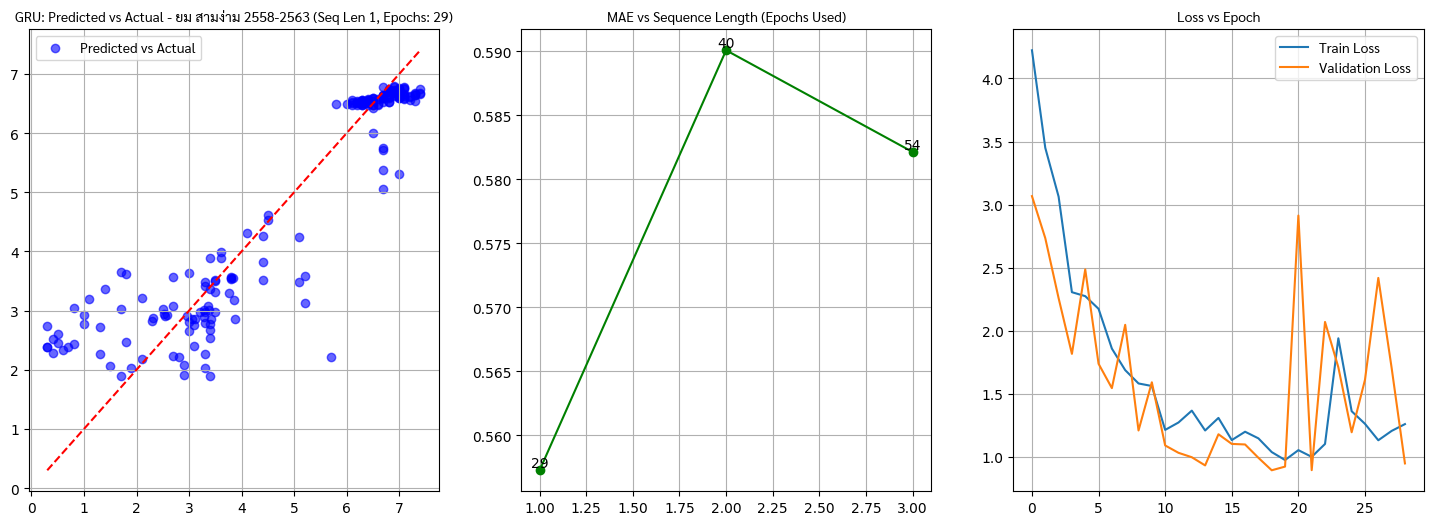

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 4.8162 - mae: 1.3233 - val_loss: 1.0024 - val_mae: 0.7694
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2123 - mae: 0.9073 - val_loss: 0.8523 - val_mae: 0.7713
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2705 - mae: 0.9378 - val_loss: 1.7637 - val_mae: 1.1450
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9843 - mae: 0.8042 - val_loss: 0.8162 - val_mae: 0.7554
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4802 - mae: 0.9925 - val_loss: 1.1331 - val_mae: 0.9484
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1448 - mae: 0.8849 - val_loss: 0.8753 - val_mae: 0.7514
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9677 - mae: 0.7912 - val_loss: 1.1949 - val_mae: 0.8256
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9445 - mae: 0.7824 - val_loss: 2.1679 - val_mae: 1.2784
Epoch 9/100
350/350 ━━━━━━━━━

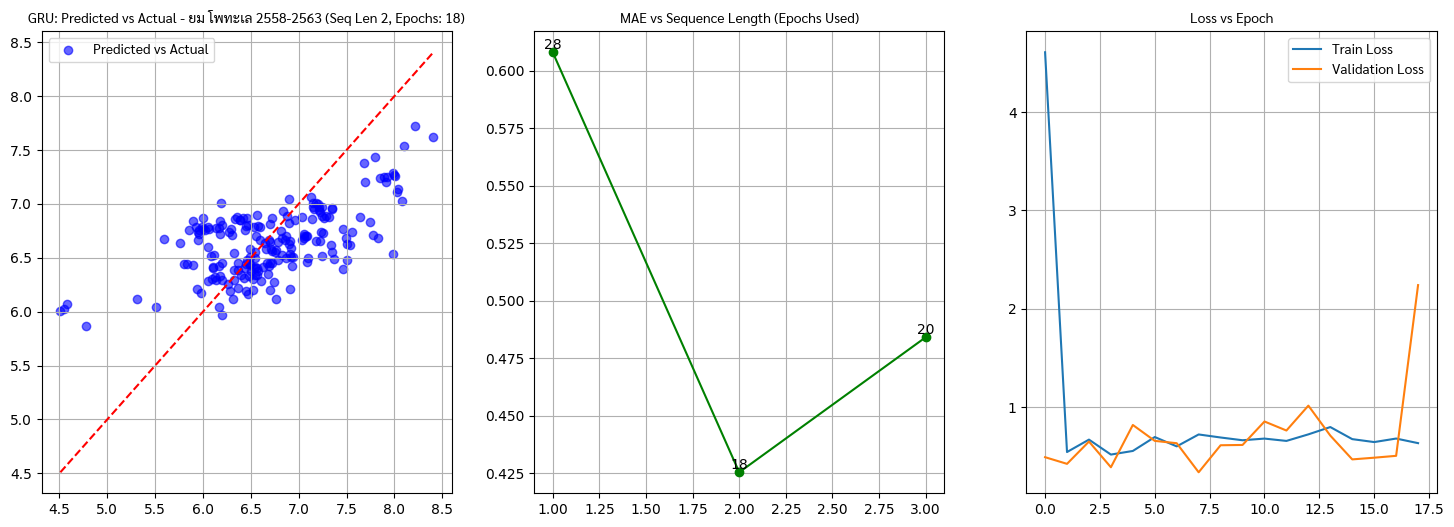

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 12.7120 - mae: 2.1893 - val_loss: 2.7221 - val_mae: 1.3466
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6052 - mae: 1.3592 - val_loss: 2.7162 - val_mae: 1.3846
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8902 - mae: 1.4056 - val_loss: 2.2176 - val_mae: 1.2679
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3943 - mae: 1.2905 - val_loss: 2.3874 - val_mae: 1.2777
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6794 - mae: 1.3348 - val_loss: 2.3539 - val_mae: 1.2834
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6850 - mae: 1.3498 - val_loss: 2.3337 - val_mae: 1.2608
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2872 - mae: 1.2430 - val_loss: 2.3164 - val_mae: 1.2682
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2503 - mae: 1.2366 - val_loss: 2.6138 - val_mae: 1.3274
Epoch 9/100
350/350 ━━━━━━━━

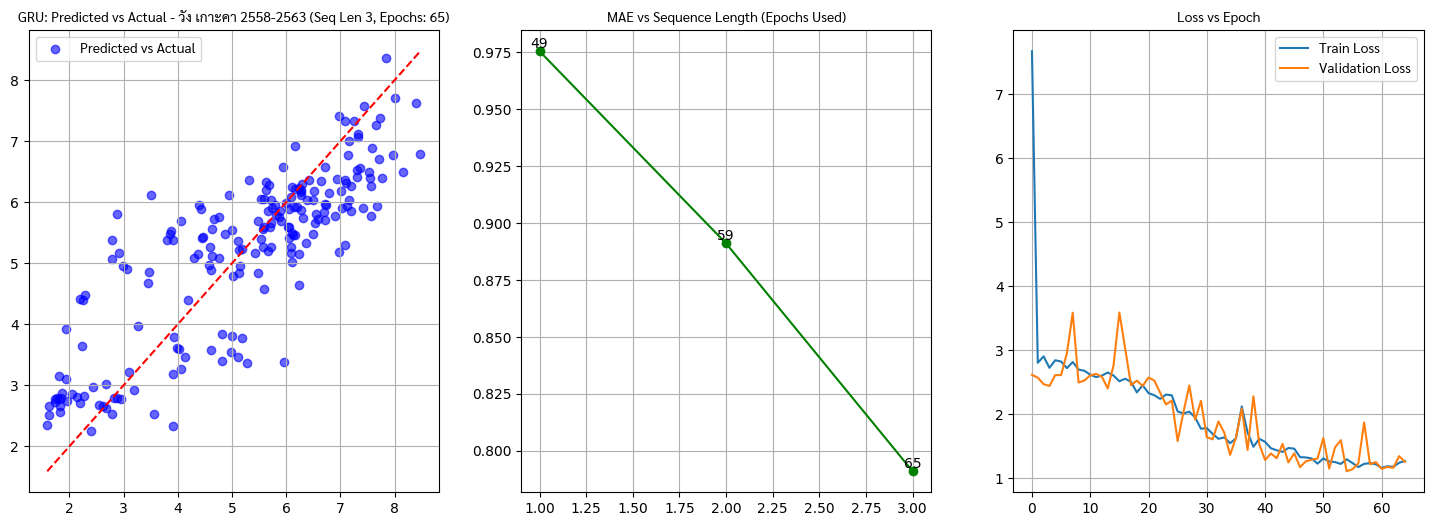

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 95.7100 - mae: 4.0705 - val_loss: 0.0258 - val_mae: 0.1168
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0336 - mae: 0.1359 - val_loss: 0.0259 - val_mae: 0.1134
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0308 - mae: 0.1293 - val_loss: 0.0380 - val_mae: 0.1628
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0353 - mae: 0.1402 - val_loss: 0.0724 - val_mae: 0.2444
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0577 - mae: 0.1782 - val_loss: 0.0286 - val_mae: 0.1376
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0417 - mae: 0.1557 - val_loss: 0.0508 - val_mae: 0.1652
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0482 - mae: 0.1719 - val_loss: 0.0432 - val_mae: 0.1440
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0438 - mae: 0.1622 - val_loss: 0.1604 - val_mae: 0.3745
Epoch 9/100
350/350 ━━━━━━━━

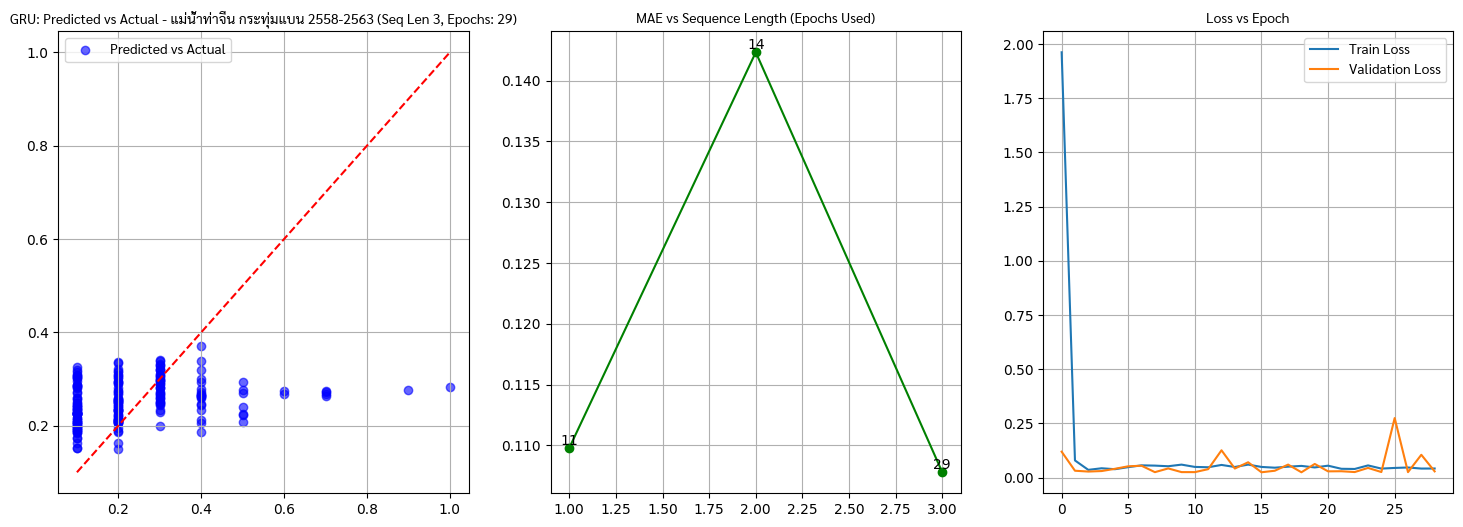

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 22.3246 - mae: 2.5351 - val_loss: 0.1311 - val_mae: 0.2819
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1602 - mae: 0.3147 - val_loss: 0.1541 - val_mae: 0.3021
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1491 - mae: 0.2961 - val_loss: 0.0901 - val_mae: 0.2335
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2176 - mae: 0.3549 - val_loss: 0.1272 - val_mae: 0.2796
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1352 - mae: 0.2862 - val_loss: 0.1002 - val_mae: 0.2397
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1301 - mae: 0.2802 - val_loss: 0.1408 - val_mae: 0.3033
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1442 - mae: 0.3014 - val_loss: 0.0701 - val_mae: 0.2202
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1314 - mae: 0.2830 - val_loss: 0.1609 - val_mae: 0.3449
Epoch 9/100
350/350 ━━━━━━━━

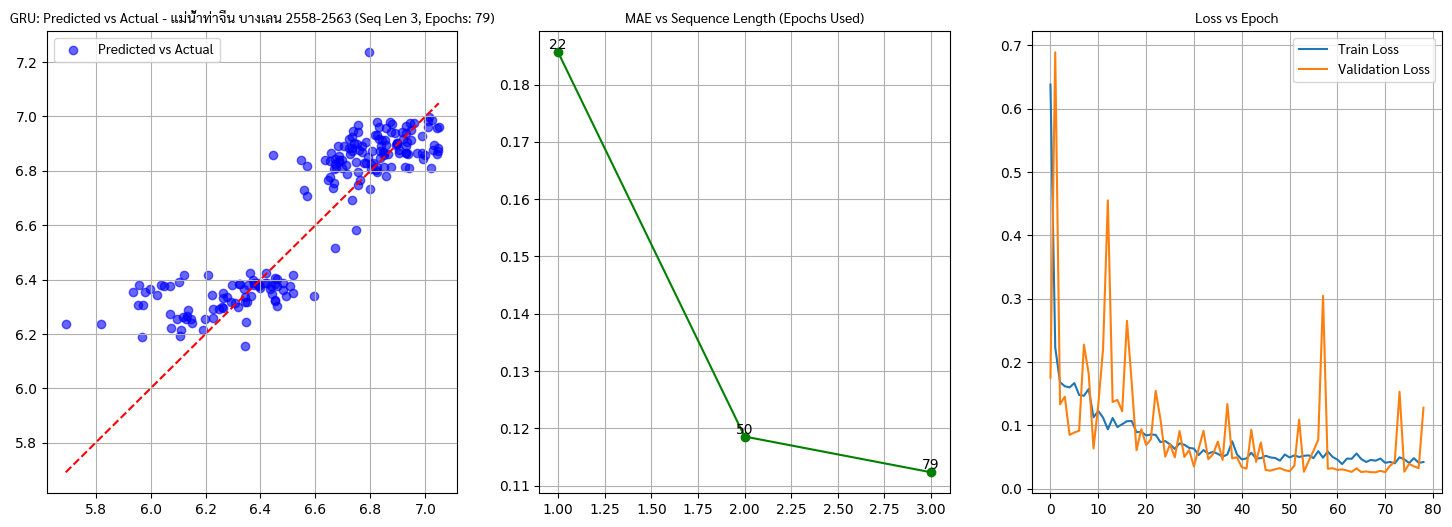

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 1.4807 - mae: 0.6046 - val_loss: 0.1600 - val_mae: 0.3199
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1549 - mae: 0.3182 - val_loss: 0.1368 - val_mae: 0.2984
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1481 - mae: 0.3110 - val_loss: 0.1089 - val_mae: 0.2697
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1640 - mae: 0.3240 - val_loss: 0.1440 - val_mae: 0.3024
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1995 - mae: 0.3457 - val_loss: 0.1477 - val_mae: 0.3108
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1790 - mae: 0.3376 - val_loss: 0.1276 - val_mae: 0.2897
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1968 - mae: 0.3502 - val_loss: 0.1047 - val_mae: 0.2719
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1481 - mae: 0.3054 - val_loss: 0.1030 - val_mae: 0.2653
Epoch 9/100
350/350 ━━━━━━━━━

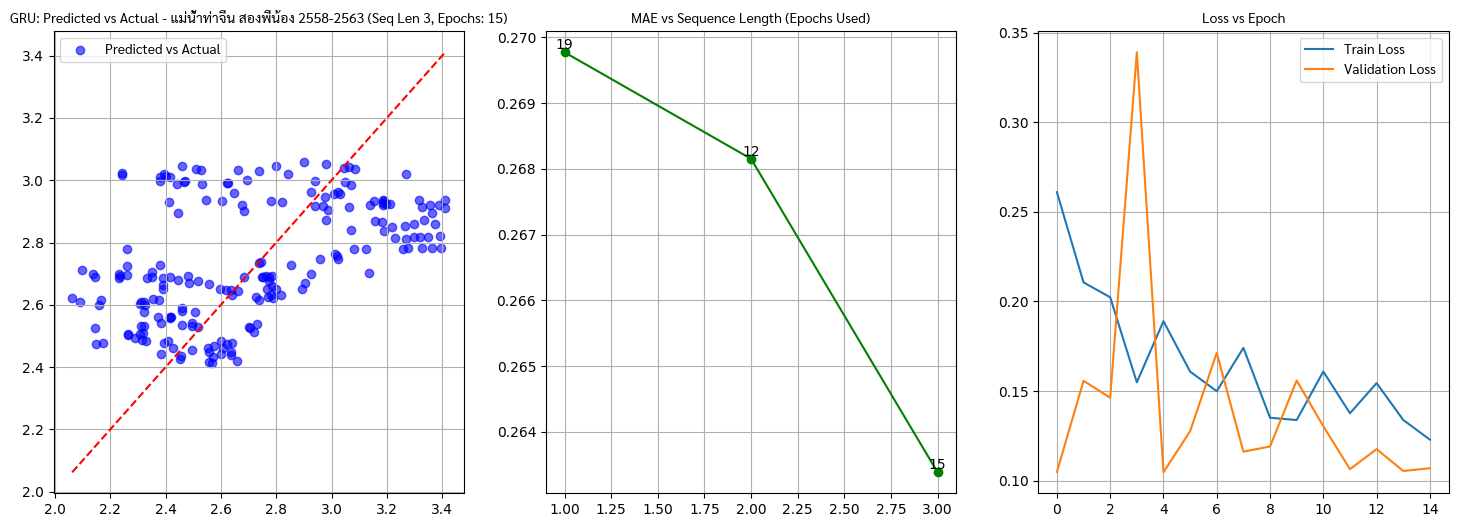

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 13.4551 - mae: 1.7844 - val_loss: 0.6026 - val_mae: 0.6504
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6899 - mae: 0.6730 - val_loss: 0.8516 - val_mae: 0.6900
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7499 - mae: 0.6920 - val_loss: 0.5687 - val_mae: 0.6134
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8266 - mae: 0.7211 - val_loss: 0.6435 - val_mae: 0.6795
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6826 - mae: 0.6617 - val_loss: 0.8745 - val_mae: 0.8023
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7162 - mae: 0.6816 - val_loss: 0.9409 - val_mae: 0.8322
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7449 - mae: 0.6871 - val_loss: 0.5732 - val_mae: 0.5973
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7872 - mae: 0.7200 - val_loss: 0.6357 - val_mae: 0.6696
Epoch 9/100
350/350 ━━━━━━━━

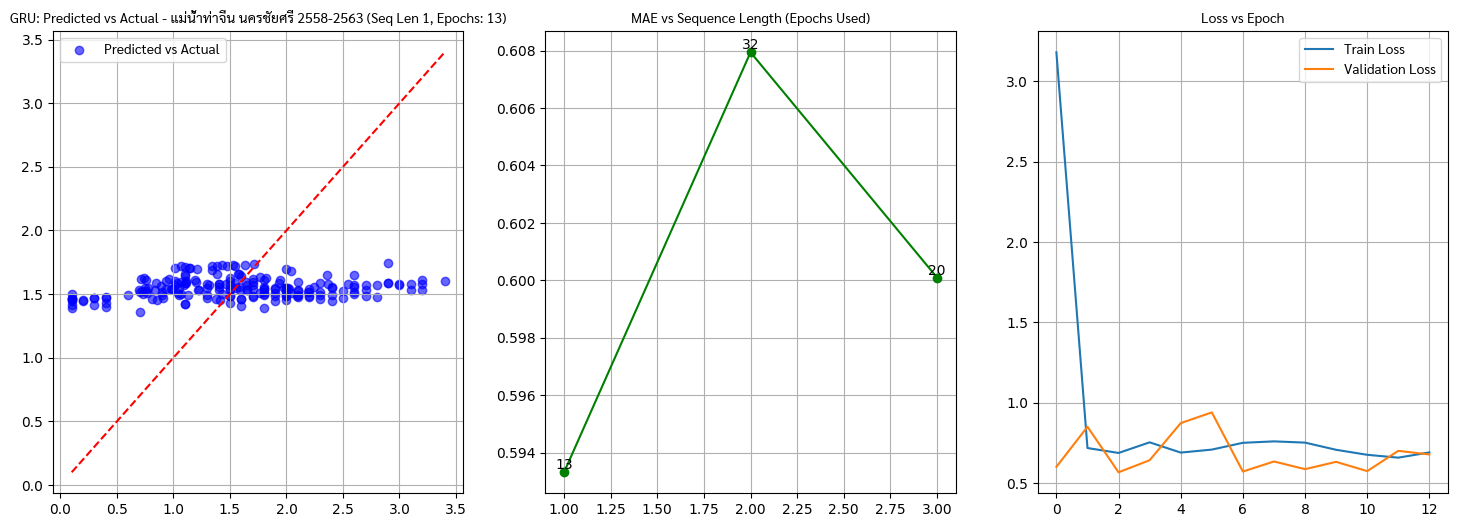

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 21.4980 - mae: 2.1253 - val_loss: 0.1526 - val_mae: 0.3309
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1426 - mae: 0.3045 - val_loss: 0.1561 - val_mae: 0.3362
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1192 - mae: 0.2768 - val_loss: 0.1168 - val_mae: 0.2753
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1339 - mae: 0.2935 - val_loss: 0.1331 - val_mae: 0.2802
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1345 - mae: 0.2959 - val_loss: 0.1478 - val_mae: 0.2877
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1564 - mae: 0.3172 - val_loss: 0.1367 - val_mae: 0.3086
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1459 - mae: 0.3114 - val_loss: 0.1121 - val_mae: 0.2636
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1384 - mae: 0.3004 - val_loss: 0.1327 - val_mae: 0.3089
Epoch 9/100
350/350 ━━━━━━━━

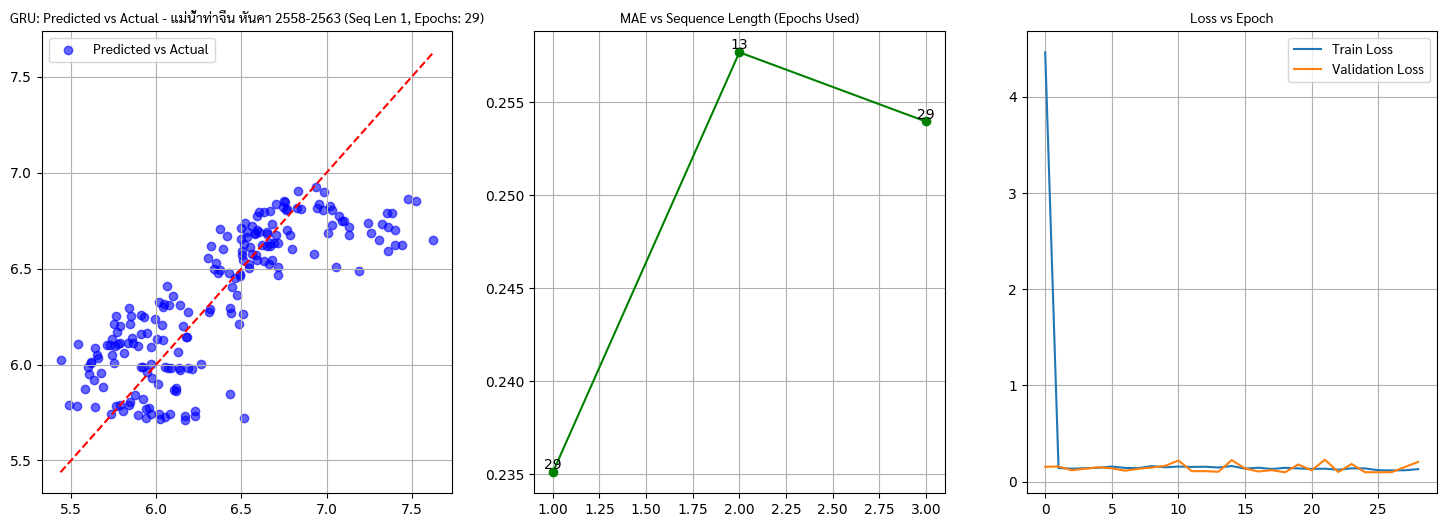

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.7532 - mae: 0.6189 - val_loss: 0.2851 - val_mae: 0.3839
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3611 - mae: 0.4759 - val_loss: 0.3643 - val_mae: 0.3972
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4270 - mae: 0.5217 - val_loss: 0.2969 - val_mae: 0.3823
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3337 - mae: 0.4542 - val_loss: 0.2734 - val_mae: 0.3916
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3247 - mae: 0.4522 - val_loss: 0.2667 - val_mae: 0.4281
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3471 - mae: 0.4714 - val_loss: 0.3598 - val_mae: 0.3949
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3642 - mae: 0.4842 - val_loss: 0.4926 - val_mae: 0.6418
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4376 - mae: 0.5312 - val_loss: 0.3109 - val_mae: 0.3812
Epoch 9/100
350/350 ━━━━━━━━━

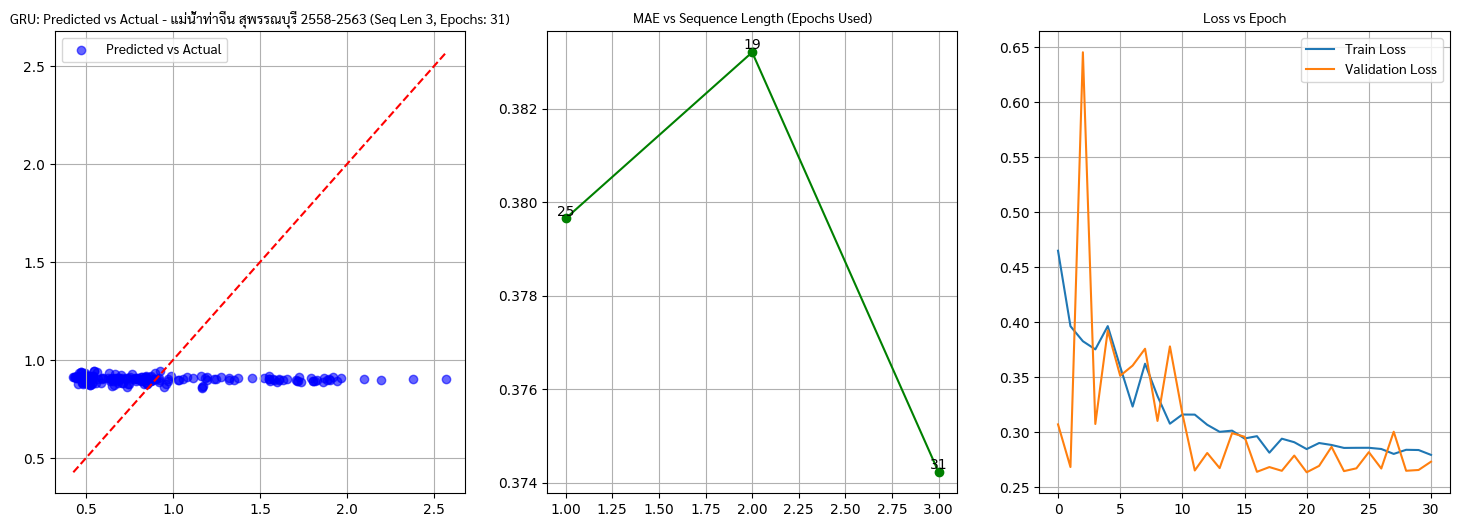

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 12.6665 - mae: 1.7990 - val_loss: 0.5704 - val_mae: 0.5876
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8369 - mae: 0.7097 - val_loss: 0.6672 - val_mae: 0.6448
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8871 - mae: 0.7195 - val_loss: 0.6604 - val_mae: 0.6709
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0232 - mae: 0.7449 - val_loss: 0.6425 - val_mae: 0.6247
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0235 - mae: 0.7661 - val_loss: 1.2605 - val_mae: 0.8338
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3140 - mae: 0.8151 - val_loss: 1.6487 - val_mae: 0.9001
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8575 - mae: 0.7236 - val_loss: 3.6263 - val_mae: 1.2391
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5544 - mae: 0.8241 - val_loss: 3.4385 - val_mae: 1.2767
Epoch 9/100
350/350 ━━━━━━━━

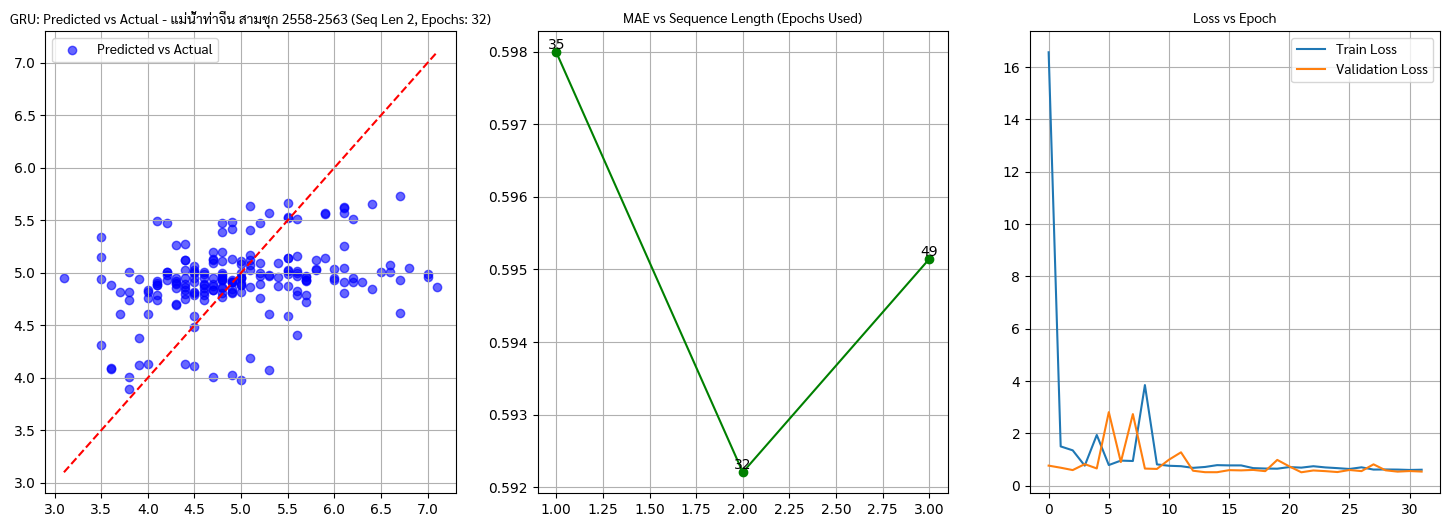

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 6.3133 - mae: 1.7817 - val_loss: 2.1145 - val_mae: 1.1740
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2002 - mae: 1.2109 - val_loss: 1.8997 - val_mae: 1.1473
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1196 - mae: 1.1651 - val_loss: 1.9529 - val_mae: 1.0374
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9329 - mae: 1.0825 - val_loss: 2.1650 - val_mae: 1.0663
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0759 - mae: 1.1363 - val_loss: 1.9538 - val_mae: 1.0121
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0633 - mae: 1.1387 - val_loss: 1.8383 - val_mae: 1.0840
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7663 - mae: 1.0491 - val_loss: 2.2264 - val_mae: 1.0922
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0031 - mae: 1.0992 - val_loss: 1.8742 - val_mae: 1.0628
Epoch 9/100
350/350 ━━━━━━━━━

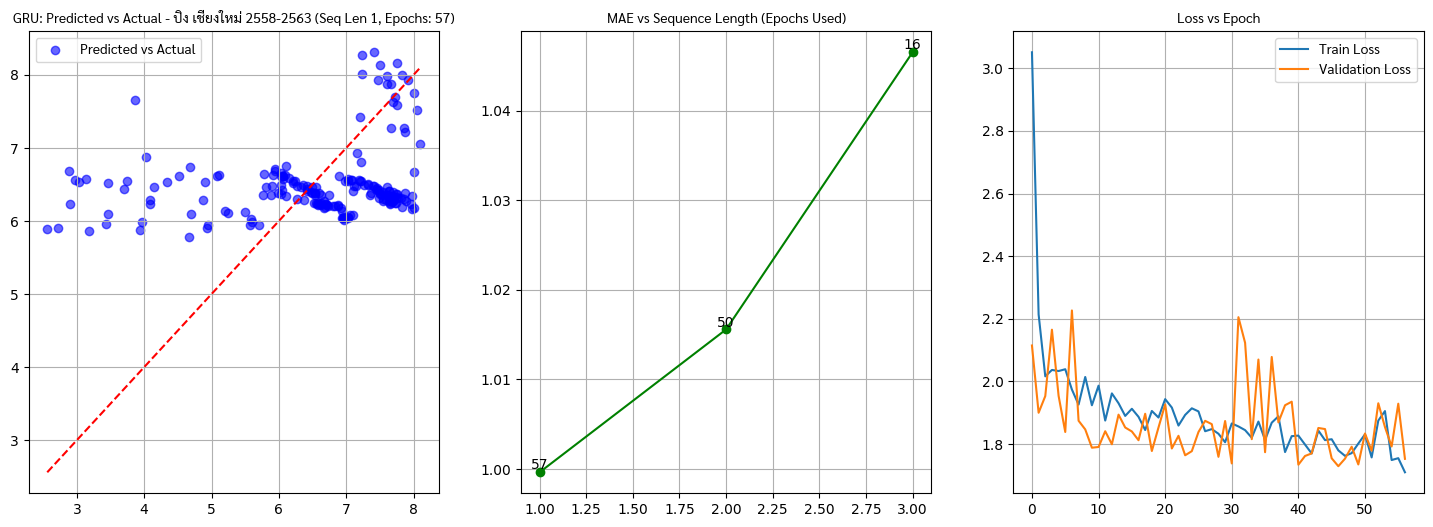

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.0007 - mae: 1.0596 - val_loss: 0.2090 - val_mae: 0.3551
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2326 - mae: 0.3827 - val_loss: 0.3929 - val_mae: 0.4993
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2380 - mae: 0.3772 - val_loss: 0.2086 - val_mae: 0.3571
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2126 - mae: 0.3623 - val_loss: 0.1625 - val_mae: 0.3169
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2021 - mae: 0.3559 - val_loss: 0.3114 - val_mae: 0.4567
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2289 - mae: 0.3710 - val_loss: 0.1635 - val_mae: 0.3218
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2067 - mae: 0.3624 - val_loss: 0.1491 - val_mae: 0.3031
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1842 - mae: 0.3418 - val_loss: 0.2065 - val_mae: 0.3647
Epoch 9/100
350/350 ━━━━━━━━━

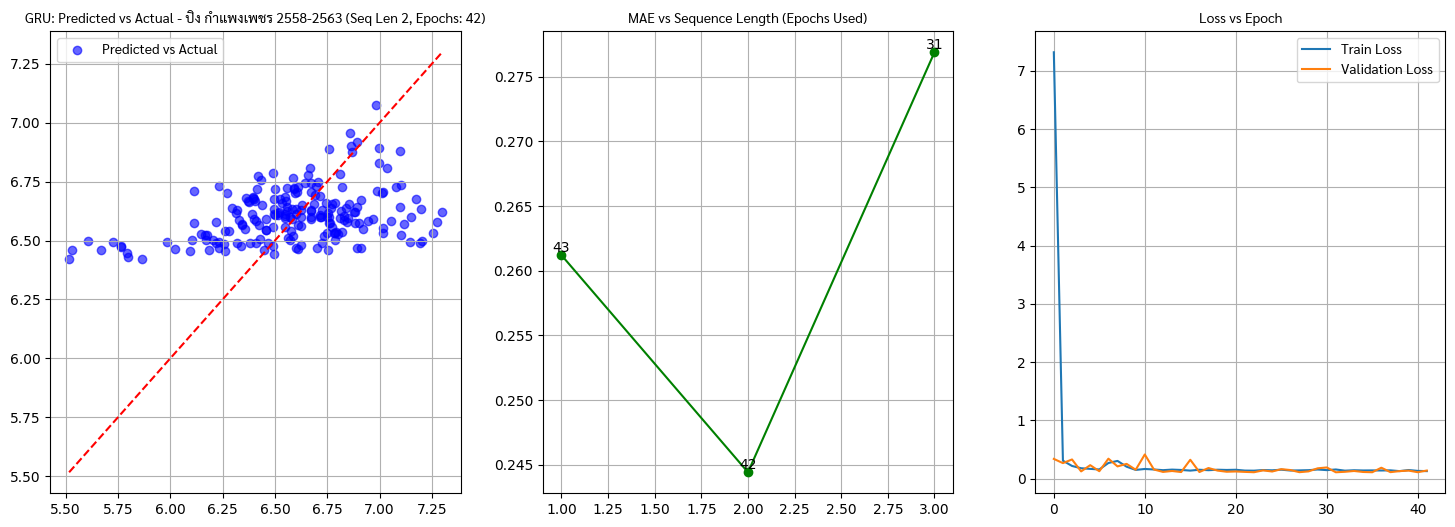

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.0221 - mae: 0.7483 - val_loss: 0.1165 - val_mae: 0.2570
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1844 - mae: 0.3110 - val_loss: 0.1209 - val_mae: 0.2595
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1619 - mae: 0.2900 - val_loss: 0.1182 - val_mae: 0.2561
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1374 - mae: 0.2862 - val_loss: 0.1387 - val_mae: 0.2777
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1330 - mae: 0.2832 - val_loss: 0.1251 - val_mae: 0.2799
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1264 - mae: 0.2706 - val_loss: 0.1030 - val_mae: 0.2404
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1390 - mae: 0.2979 - val_loss: 0.1298 - val_mae: 0.2668
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1094 - mae: 0.2550 - val_loss: 0.1714 - val_mae: 0.3471
Epoch 9/100
350/350 ━━━━━━━━━

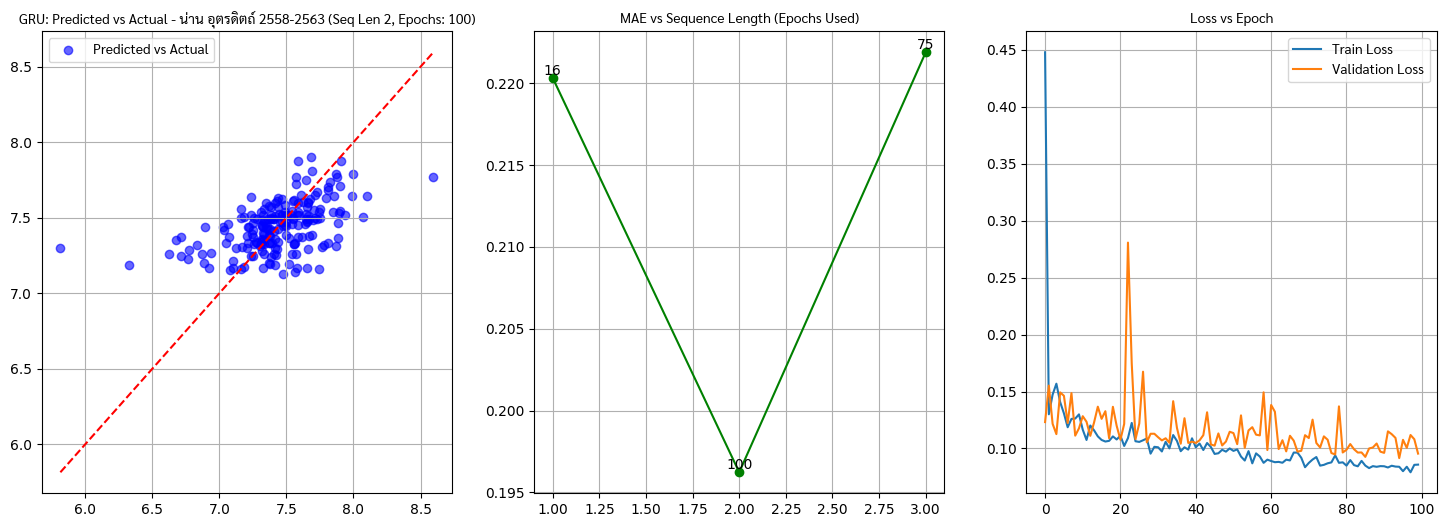

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 6.4981 - mae: 1.4096 - val_loss: 0.2608 - val_mae: 0.4142
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3334 - mae: 0.4766 - val_loss: 0.2669 - val_mae: 0.4226
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3468 - mae: 0.4796 - val_loss: 0.2630 - val_mae: 0.4192
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3255 - mae: 0.4625 - val_loss: 0.4487 - val_mae: 0.5752
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3532 - mae: 0.4847 - val_loss: 0.2661 - val_mae: 0.4053
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3323 - mae: 0.4685 - val_loss: 0.3855 - val_mae: 0.5222
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3154 - mae: 0.4605 - val_loss: 0.2930 - val_mae: 0.4253
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3016 - mae: 0.4448 - val_loss: 0.3117 - val_mae: 0.4352
Epoch 9/100
350/350 ━━━━━━━━━

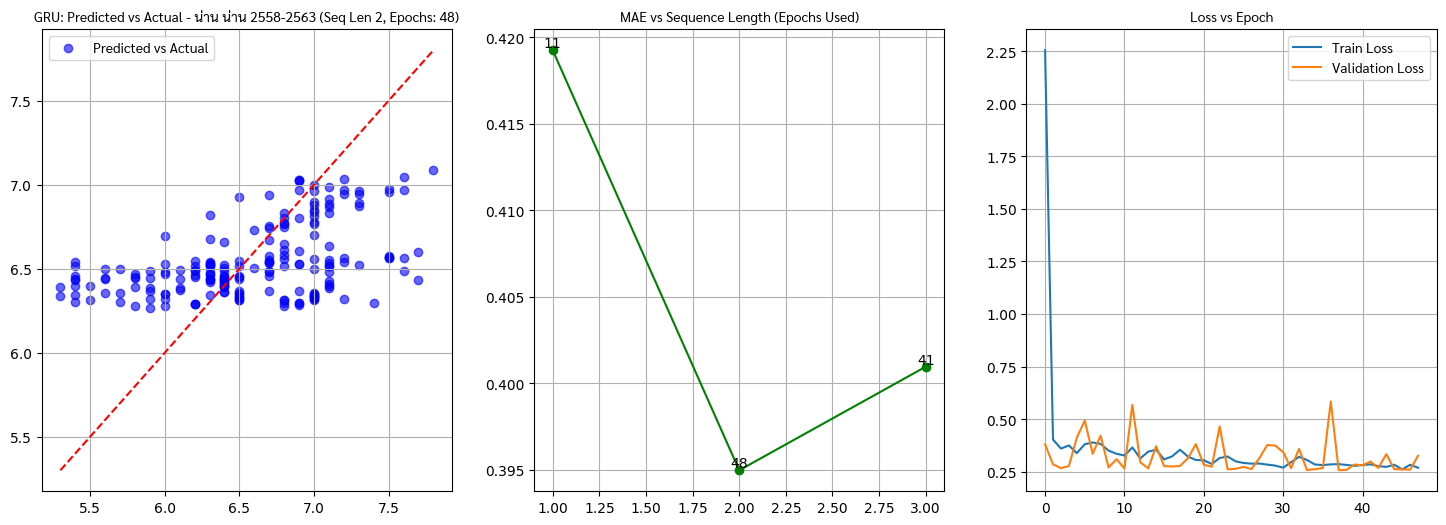

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 13.6599 - mae: 2.1220 - val_loss: 0.3210 - val_mae: 0.4522
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3438 - mae: 0.4746 - val_loss: 0.2587 - val_mae: 0.4031
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3269 - mae: 0.4623 - val_loss: 0.2391 - val_mae: 0.3984
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2568 - mae: 0.4096 - val_loss: 0.2581 - val_mae: 0.3970
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2421 - mae: 0.3943 - val_loss: 0.1749 - val_mae: 0.3409
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2119 - mae: 0.3718 - val_loss: 0.1618 - val_mae: 0.3252
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2080 - mae: 0.3695 - val_loss: 0.1587 - val_mae: 0.3194
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1995 - mae: 0.3641 - val_loss: 0.3404 - val_mae: 0.4637
Epoch 9/100
350/350 ━━━━━━━━

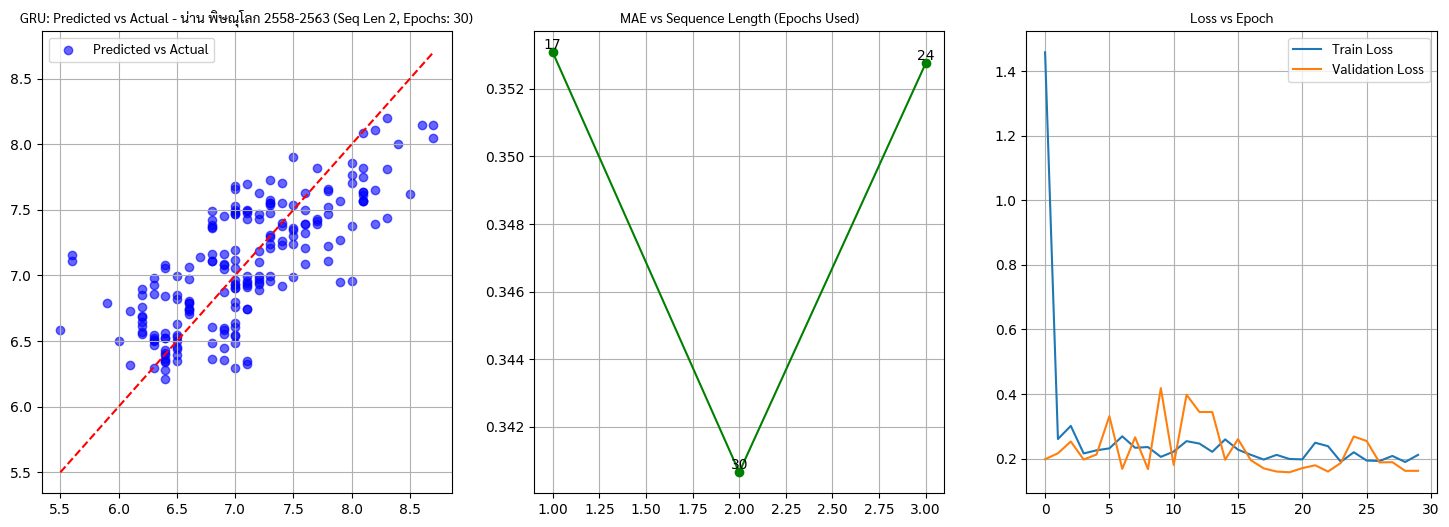

In [14]:
for station, dataset in datasets.items():
    seq_results = []

    for seq_len in range(1, 4):
        print(f"Sequence Length: {seq_len}")
        X, y = create_sequences(dataset.X, dataset.y, seq_len)
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=TRAIN_RATIO, random_state=RANDOM_STATE)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_RATIO / (TEST_RATIO + VAL_RATIO), random_state=RANDOM_STATE)

        model = models.Sequential([
            layers.Input(shape=(seq_len, 3)),
            layers.GRU(64, activation="relu", return_sequences=True),
            layers.GRU(32, activation="relu"),
            layers.Dense(1)
        ])

        model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
        history = model.fit(
            X_train, y_train, 
            epochs=100,
            batch_size=4,
            validation_data=(X_val, y_val),
            callbacks=[callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)]
        )

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        seq_results.append((seq_len, mae, model, y_test, y_pred, history))

    best_len, best_mae, best_model, best_y_test, best_y_pred, best_history = min(seq_results, key=lambda x: x[1])
    best_epochs = len(best_history.history["loss"])

    mae = mean_absolute_error(best_y_test, best_y_pred)
    mse = mean_squared_error(best_y_test, best_y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(best_y_test, best_y_pred)

    best_model.save(OUTPUT_PATH / f"{station}_model.keras")
    results.append({"station": station, "seq_len": best_len, "epochs": best_epochs, "mae": best_mae})

    print(f"Station: {station}")
    print(f"Best Sequence Length: {best_len} (Epochs: {best_epochs})")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].scatter(best_y_test, best_y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    ax[0].plot([min(best_y_test), max(best_y_test)], [min(best_y_test), max(best_y_test)], "r--")
    ax[0].set_title(f"GRU: Predicted vs Actual - {station} (Seq Len {best_len}, Epochs: {best_epochs})", fontproperties=font_prop)
    ax[0].legend(prop=font_prop)
    ax[0].grid()

    seq_lens, maes, _, _, _, histories = zip(*seq_results)
    epochs_used = [len(h.history["loss"]) for h in histories]

    ax[1].plot(seq_lens, maes, marker="o", linestyle="-", color="green")
    for i, (seq_len, mae, epoch) in enumerate(zip(seq_lens, maes, epochs_used)):
        ax[1].text(seq_len, mae, f"{epoch}", ha="center", va="bottom", fontsize=10)
    ax[1].set_title("MAE vs Sequence Length (Epochs Used)", fontproperties=font_prop)
    ax[1].grid()

    ax[2].plot(best_history.history["loss"], label="Train Loss")
    ax[2].plot(best_history.history["val_loss"], label="Validation Loss")
    ax[2].set_title("Loss vs Epoch", fontproperties=font_prop)
    ax[2].legend(prop=font_prop)
    ax[2].grid()

    plt.savefig(OUTPUT_PATH / f"gru-pred-actual-{station}.png")
    plt.show()

In [15]:
results_df = DataFrame(results)
results_df.to_csv(OUTPUT_PATH / "results.csv", index=False)